<font color = blue size = 2 >
    
# Desafío 2: Rendimiento Escolar
</font>

Modelo de predicción de alumnos con bajo desempeño académico, medido en el promedio final del año escolar.

<a id='contenidos' />

### INDICE

- 1. [Preliminares](#preliminares)
    - 1.1 [Problema](#PROBLEMA)
    - 1.2 [Objetivo](#OBJETIVO)
    - 1.3 [Solución al problema](#OBJETIVO)
    - 1.4 [Métricas de desempeño](#OBJETIVO)
        * 1.4.1 [Bondad de ajuste del modelo](#dfa)
            * 1.4.1.1 [Test F](#dfa)
            * 1.4.1.2 [R^2](#dfa)
            * 1.4.1.3 [R^2 Ajustado](#dfa)
            * 1.4.1.4 [Criterio de Akaike](#dfa)
            * 1.4.1.5 [Criterio de información bayesiano](#dfa)
        * 1.4.2 [Influencia de cada una de las variables independientes](#kpss)
            * 1.4.2.1 [Test t (P>|t|)](#dfa)
            * 1.4.2.2 [Coeficientes beta (β)](#dfa)
        * 1.4.3 [Evaluación de resultados](#dfa)
            * 1.4.3.1 [MSE](#dfa)
            * 1.4.3.2 [RMSE](#dfa)
            * 1.4.3.3 [MAE](#dfa)
            
        
- 2. [Aspectos computacionales](#aspectos) 
    - 2.1 [Librería utilizadas](#librerías)
    - 2.2 [Preprocesamiento y recodificación de datos](#recod)
        - 2.2.1 [Estandarización del nombre de las columnas](#estandarizacion)
        - 2.2.2 [Recodificación de variables](#recodificación)
        
        
- 3. [Descripción](#descripción) 
    - 3.1 [Medidad descriptivas](#)
    - 3.2 [Gráfico de variables](#)
    - 3.3 [Datos perdidos](#)
    - 3.4 [Correlacion](#)
    - 3.5 [Re-recodificación de variables](#rerecodificación)
    
- 4. [Modelación descriptiva](#MD)  
- 5. [Modelación predictiva](#MP)  
- 6. [Variables contenidas en la base de datos](#base)            

<a id='preliminares'>
 
## 1. Preliminares

[(back to top)](#contenidos)

Descripción del problema, objetivos, solución (criterio de optimización y metricas de desempeño).

##### A. PROBLEMA:
</div> Una escuela Portuguesa quiere identificar a los alumnos con bajo desempeño académico, medido en el promedio final del año escolar.

##### B. OBJETIVO:
</div> A través de registros sociodemográficos, conductuales y aspectos ambientales de los alumnos de dos escuelas se buscará perfilar a los estudiantes y generar un modelo que identifique aquellos alumnos que presentan un bajo desempeño académico.

##### C. SOLUCIÓN:
</div> Se realiza un modelo de regresion lineal múltiple, donde se modela el efecto que tienen las variables independientes sobre la variable dependiente que en este caso responde al rendimiento escolar ("G1", "G2", "G3").
$$y_i = \beta_0 + \sum_{i=1}^n \beta_i x_i + \epsilon_i$$

Se realizará en una primera instancia un modelo desde la econometría y luego se constratará con el modelos desde el machine learning.

Problema de optimización: método de **mínimos cuadrados ordinarios**.

##### D. METRICAS DE DESEMPEÑO:

<font color = gray size = 3 >  
###### Bondad de Ajuste
</font>  

</div>  Como métricas que informan sobre la capacidad explicativa y de desempeño general del modelo consideraremos:

**1. Test F:** sí el número otorgado es menor a 0,05 es que el modelo es estadísticamente significativo y por tanto las variables independientes explican “algo” del comportamiento de la variable dependiente, cuánto “algo” es la R-cuadrado.

**2. R^2:** es cuánto de las variables independientes explican a la variable dependiente. Es decir, indica el porcentaje de la varianza de la variable dependiente que es explicado por el conjunto de variables independientes. Cuanto mayor sea la R-cuadrado más explicativo y mejor será el modelo explicativo.

**3. R^2 Adj:** el r cuadrado ajustado en una métrica que compara entre modelos penalizado la cantidad de parámetros a estimar.

**4. Criterio de información de Akaike (AIC):** dado un conjunto de modelos candidatos para los datos, el modelo preferido es el que tiene el valor mínimo en el AIC.  AIC  recompensa la bondad de ajuste, también incluye una penalidad, que es una función creciente del número de parámetros estimados. Esta penalización desalienta el sobreajuste.
    Un AIC más bajo significa que se considera que un modelo está más cerca de la verdad. 
    
**5. Criterio de información Bayesiano (BIC):** BIC es una estimación de una función de la probabilidad posterior de que un modelo sea verdadero, bajo una determinada configuración bayesiana, de modo que un BIC más bajo significa que se considera que es más probable que un modelo sea el modelo verdadero.

<font color = gray size = 3 >  
###### Influencia de cada una de las variables independientes
</font>  

**1. Significación de t-test (P>|t|):** si es menor de 0,05 es que esa variable independiente se relaciona de forma significativa con la variable dependiente, por tanto, influye sobre ella, la explica y ayuda a predecirla.

**2. Coeficiente beta (β):** indica la intensidad y la dirección de la relación entre esa variable independiente y la variable dependiente.

<font color = gray size = 3 >  
###### Evaluación de resultados
</font>  

**1. MSE:** Mide el error cuadrado promedio de nuestras predicciones. Para cada punto, calcula la diferencia cuadrada entre las predicciones y el objetivo y luego promedia esos valores. Cuanto mayor sea este valor, peor es el modelo.

Desv: Si hacemos una predicción muy mala, la cuadratura empeorará aún más el error y puede sesgar la métrica para sobreestimar la maldad del modelo

**2. RMSE:** la raíz cuadrada se introduce para hacer que la escala de los errores sea igual a la escala de los objetivos.

**3. MAE:** el error se calcula como un promedio de diferencias absolutas entre los valores objetivo y las predicciones.
No es tan sensible a los valores atípicos como el MSE.

###### Diferencias:
En el MAE el error de 10 suele ser exactamente dos veces peor que el error de 5. Por otro lado, la métrica de MSE piensa que el error de 10 es cuatro veces peor que el error de 5

Regla de decision:
- La base de datos tiene outliers use **MAE**
- Si son valores inesperados que deberiamos considerar use **MSE**

<a id='aspectos'>
 
##  2. Aspectos computacionales

[(back to top)](#contenidos)
 

Librerías, módulos a implementar, funciones generadas y su objetivo


- Se debe considerar el uso de las librerías asociadas para la ingesta, preprocesamiento, visualización y modelación, así como métricas de evaluación. 
- Se debe detallar y considerar el proceso de preprocesamiento y recodificación de datos. 


<font color = gray size = 3 >  
###### 2.1   Librerías utilizadas
</font>  

In [1]:
#!pip install unidecode

# Preprocesamiento
import pandas as pd
import numpy as np
import unidecode


# Visualización 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msngo
from pandas.plotting import scatter_matrix

plt.style.use('seaborn')
warnings.filterwarnings("ignore")


# Modelación
import statsmodels.api as sm
from funciones_auxiliares import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Métricas de evaluación
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score

<font color = gray size = 3 >  
###### 2.2   Preprocesamiento y Recodificación de datos
</font>  

Comenzamos importando la base de datos. Vale aclarar que debemos tener en cuenta que los valores perdidos o no registrados en este caso, aparecen de tres formas distintas:
- nulidade
- sem validade
- zero

Por ello debemos agregar "na_values" a la hora de importar el csv.

Además, los datos se encuentran separados no por una coma, sino por el carácter "|", y el encoding es diferente.

In [2]:
df_full = pd.read_csv("students.csv", sep = "|", na_values = ["nulidade", "sem validade", "zero"], encoding = "latin1")
df = df_full
df.tail(2)

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
393,393,MS,M,"""18""",R,LE3,T,3.0,2.0,services,...,4.0,4.0,"""1""",3.0,4.0,"""5""",0.0,11.0,12,10.0
394,394,MS,M,"""19""",U,LE3,T,1.0,1.0,other,...,3.0,2.0,"""3""",3.0,3.0,"""5""",5.0,8.0,9,9.0


In [3]:
df = df.drop("Unnamed: 0", axis = 1)

In [4]:
print(f"El DataFrame contiene {df.shape[0]} filas por {df.shape[1]} columnas.")

El DataFrame contiene 395 filas por 33 columnas.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      390 non-null    object 
 1   sex         392 non-null    object 
 2   age         391 non-null    object 
 3   address     393 non-null    object 
 4   famsize     391 non-null    object 
 5   Pstatus     389 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        390 non-null    float64
 8   Mjob        389 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      391 non-null    object 
 11  guardian    391 non-null    object 
 12  traveltime  392 non-null    float64
 13  studytime   390 non-null    float64
 14  failures    390 non-null    float64
 15  schoolsup   387 non-null    object 
 16  famsup      390 non-null    object 
 17  paid        394 non-null    object 
 18  activities  390 non-null    object 
 19  nursery     389 non-null    o

<font color = gray size = 3 >  
###### 2.2.1 Estandarización del nombre de las columnas
</font>  

Los que hacemos a continuación es una transformación del nombre de las columnas del dataframe de forma de estandarizarlas (sin espacios, en minúscula,etc).

In [6]:
df.columns = process_cols(df.columns)
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3'],
      dtype='object')

 <font color = gray size = 3 >  
###### 2.2.2 Recodificación de variables
</font>  

Si observamos, vemos que hay 3 variables numéricas que se registraron como strings, cuya interpretación en pandas devuelve una estructura de datos genérica. Por ello debemos transformar dichos valores en numéricos

In [7]:
df = transformacion_numerica(df, 'age')
df = transformacion_numerica(df, 'goout')
df = transformacion_numerica(df, 'health')

<a id='descripción'>
 
##  3. Descripción

[(back to top)](#contenidos)
    
Inspección visual:
- Del vector objetivo. 
- De las variables. 
    - Ver la normalidad de las variables "sm.qqplot"
- De datos perdidos en las variables. 
De ser necesario, se puede iterar en el proceso de preprocesamiento y recodificación de las variables.

<font color = gray size = 3 >  
###### 3.1 Medidas descriptivas de los datos 
</font>  

Ahora vamos a solicitar las medidas descriptivas de los datos con los que vamos a trabajar:

In [8]:
medidas_descriptivas(df)

                                 VARIABLES CUANTITATIVAS 
                        


,count,mean,std,min,25%,50%,75%,max
age,391.0,16.70,1.28,15.0,16.0,17.0,18.0,22.0
medu,392.0,2.74,1.10,0.0,2.0,3.0,4.0,4.0
fedu,390.0,2.53,1.09,0.0,2.0,2.5,3.0,4.0
traveltime,392.0,1.45,0.70,1.0,1.0,1.0,2.0,4.0
studytime,390.0,2.04,0.84,1.0,1.0,2.0,2.0,4.0
failures,390.0,0.34,0.75,0.0,0.0,0.0,0.0,3.0
famrel,390.0,3.95,0.90,1.0,4.0,4.0,5.0,5.0
freetime,393.0,3.23,1.00,1.0,3.0,3.0,4.0,5.0
goout,390.0,3.10,1.12,1.0,2.0,3.0,4.0,5.0
dalc,392.0,1.48,0.89,1.0,1.0,1.0,2.0,5.0


                                 VARIABLES CUALITATIVAS 
                        
SCHOOL
----------
GP    345
MS     45
Name: school, dtype: int64 

----------
SEX
----------
F    206
M    186
Name: sex, dtype: int64 

----------
ADDRESS
----------
U    305
R     88
Name: address, dtype: int64 

----------
FAMSIZE
----------
GT3    278
LE3    113
Name: famsize, dtype: int64 

----------
PSTATUS
----------
T    349
A     40
Name: pstatus, dtype: int64 

----------
MJOB
----------
other       138
services    102
at_home      59
teacher      57
health       33
Name: mjob, dtype: int64 

----------
FJOB
----------
other       217
services    111
teacher      29
at_home      20
health       18
Name: fjob, dtype: int64 

----------
REASON
----------
course        144
home          108
reputation    103
other          36
Name: reason, dtype: int64 

----------
GUARDIAN
----------
mother    270
father     89
other      32
Name: guardian, dtype: int64 

----------
SCHOOLSUP
----------
no     33

<font color = gray size = 3 >  
###### 3.2 Gráfico de las variables 
</font>  


Para tener una mejor perspectiva del comportamiento de las columnas vamos a graficarlas según el tipo de datos que contenga cada variable.

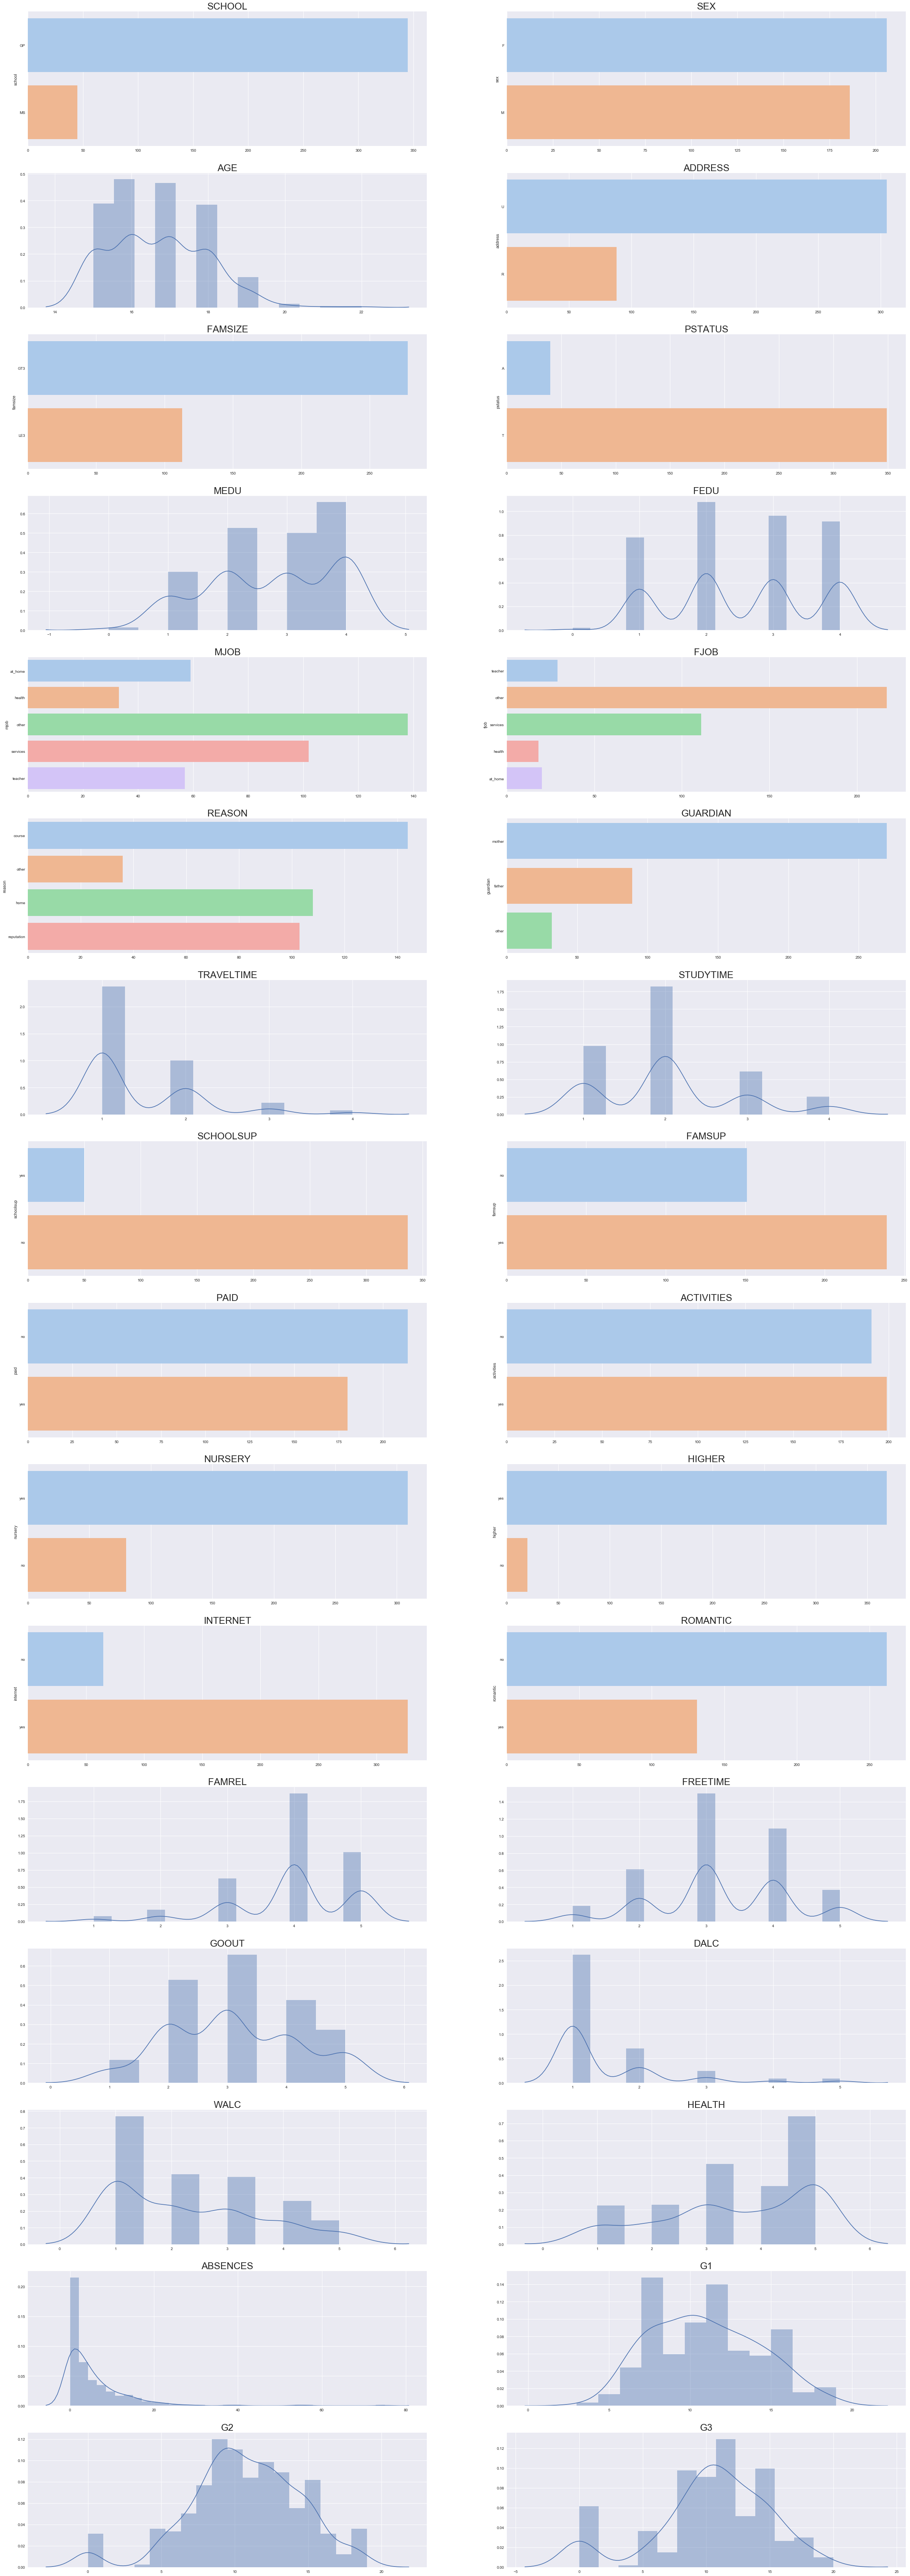

In [9]:
grafico_vbles(df.drop(columns = 'failures'))

<font color = gray size = 3 >  
###### 3.3 Datos perdidos 
</font>  

,Total,Porcentaje,Tipo de Dato
schoolsup,8,2.03,object
Pstatus,6,1.52,object
higher,6,1.52,object
nursery,6,1.52,object
Mjob,6,1.52,object
school,5,1.27,object
studytime,5,1.27,float64
Walc,5,1.27,float64
goout,5,1.27,object
famrel,5,1.27,float64


MATRIZ DE VALORES PERDIDOS


<Figure size 288x288 with 0 Axes>

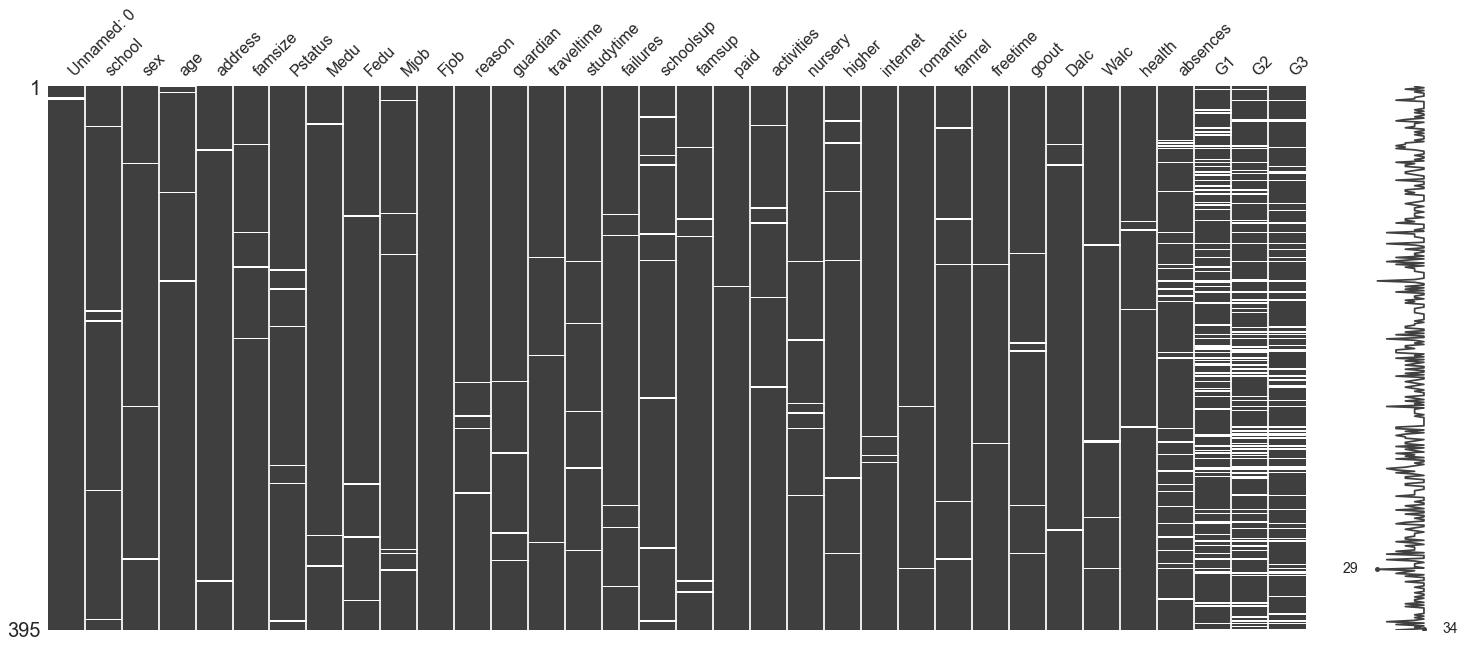

CANTIDAD DE DATOS PERDIDOS POR VARIABLE


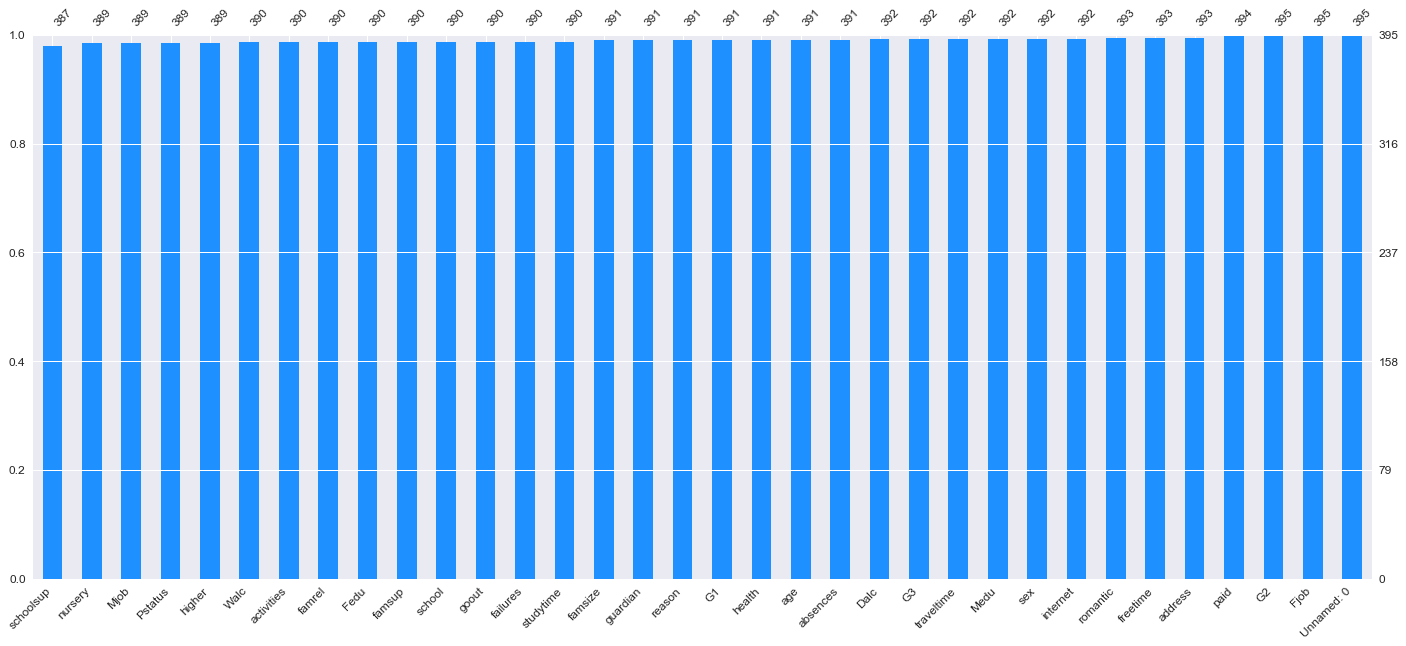

GRADO DE ASOCIACION ENTRE DATOS PERDIDOS POR VARIABLES


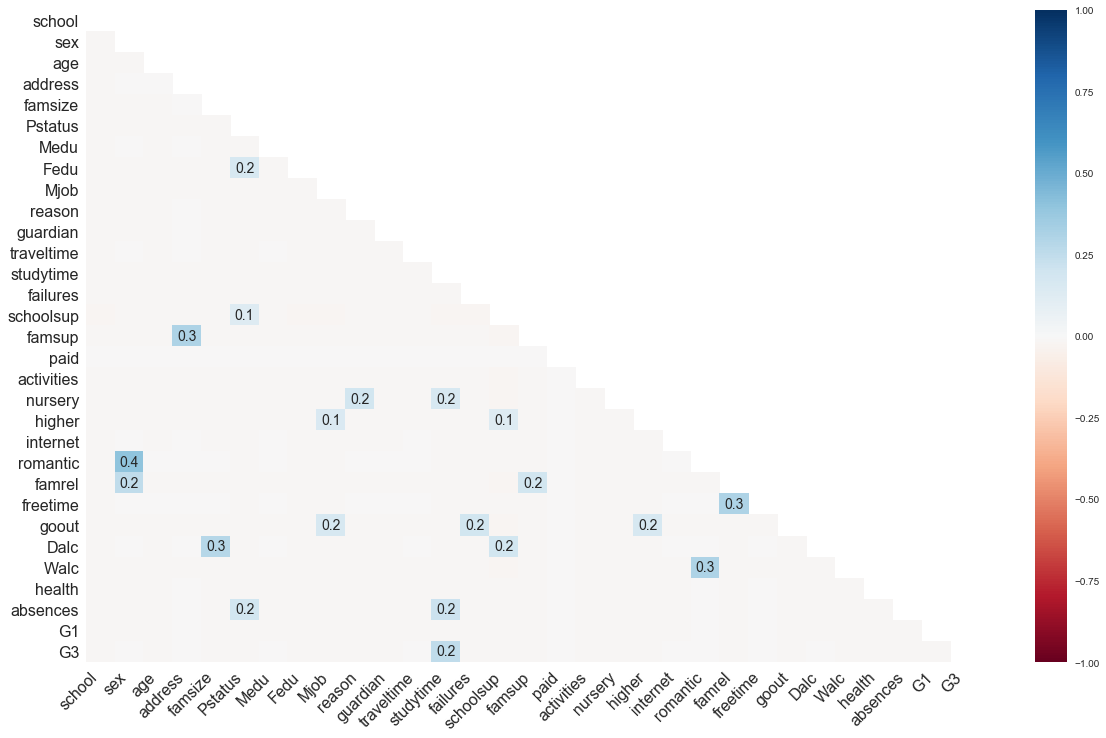



Sí eliminamos los datos faltantes perdemos el 28.1% de la muestra


In [10]:
datos_faltantes(df_full)

Vamos a tomar como supuesto que si son menores de 17 años y consumen poco alcohol los fin de semana, tambien consumen poco los dias de semanas

In [11]:
df[df["dalc"].isna()].transpose()

,42,57,322
school,GP,GP,GP
sex,M,M,F
age,15,15,17
address,U,U,R
famsize,NaN,GT3,LE3
pstatus,T,T,T
medu,4,4,2
fedu,4,4,2
mjob,services,teacher,services
fjob,teacher,health,services


In [12]:
df["dalc"] = df["dalc"].fillna(1)

In [13]:
df = df.dropna()

<font color = gray size = 3 >  
###### 3.4 Correlación 
</font>  

Vemos que muchas variables se encuentran sesgadas hacia algún valor o no-balanceadas. Ahora visualizemos las correlaciones mediante una matriz.

                                   CORRELACION ENTRE G1 Y LAS VARIABLES 
                        
age          -0.04
medu          0.19
fedu          0.18
traveltime   -0.08
studytime     0.13
failures     -0.33
famrel        0.03
freetime      0.03
goout        -0.23
dalc         -0.08
walc         -0.12
health       -0.13
absences     -0.06
g1            1.00
g2            0.85
g3            0.80
Name: g1, dtype: float64

                                 CONSIDERANDO ÚNICAMENTE LAS CORRELACIONES MAYORES A 0.4

g1    1.00
g2    0.85
g3    0.80
Name: g1, dtype: float64


                                FUERZA DE ASOCIACIÓN ENTRE LAS VARIABLES MAYOR A 0.4                         



,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
age,1,,,,,,,,,,,,,,,
medu,,1,0.64,,,,,,,,,,,,,
fedu,,0.64,1,,,,,,,,,,,,,
traveltime,,,,1,,,,,,,,,,,,
studytime,,,,,1,,,,,,,,,,,
failures,,,,,,1,,,,,,,,,,
famrel,,,,,,,1,,,,,,,,,
freetime,,,,,,,,1,,,,,,,,
goout,,,,,,,,,1,,0.45,,,,,
dalc,,,,,,,,,,1,0.64,,,,,


Excluir del análisis la que explique menos el comportamiento de la variable a predecir. Debido a que, de los contrario, podría existir un fuerte problema de autocorrelacion en la predicción.


                                             GRÁFICO DE CALOR                                        


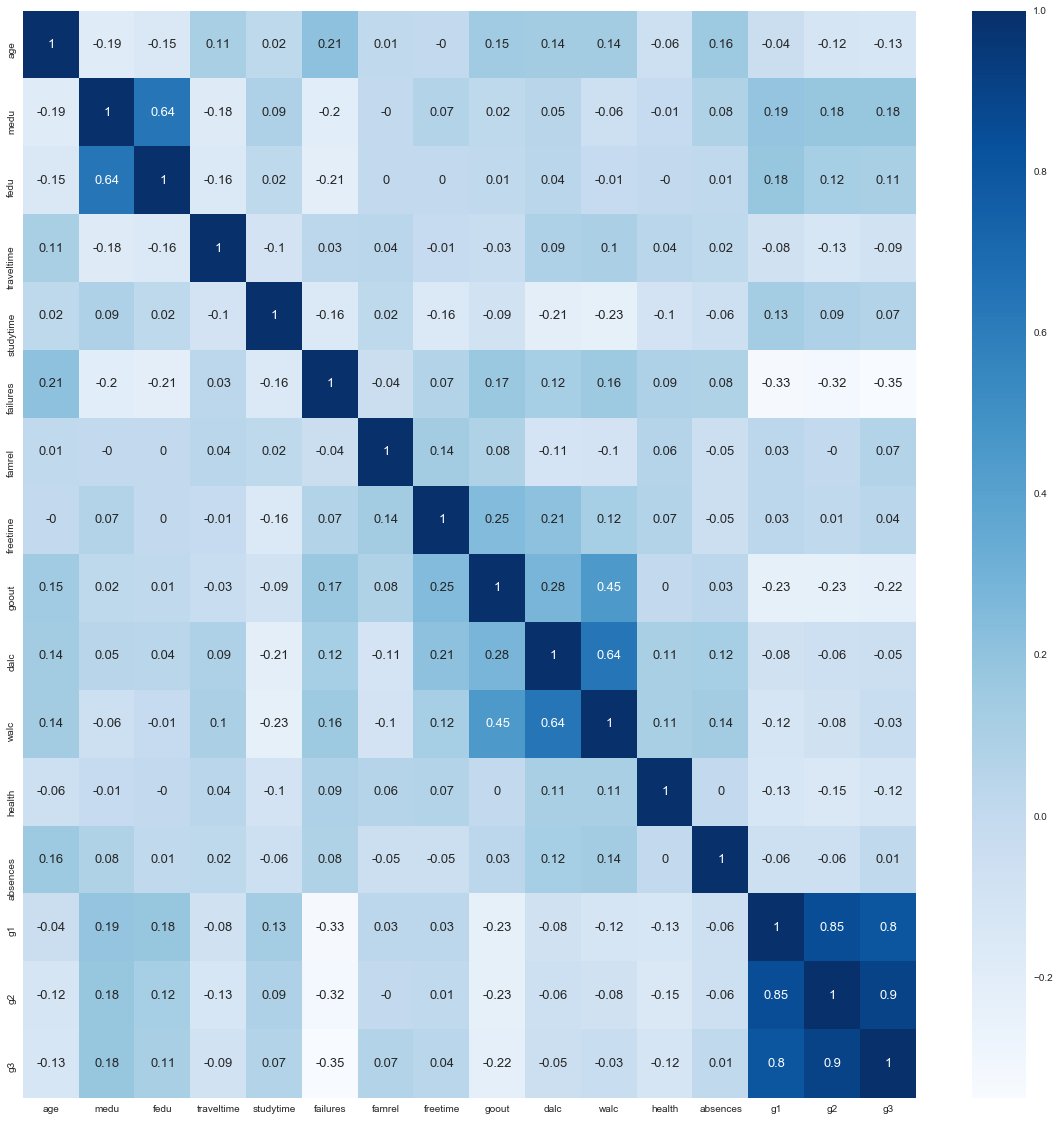

In [14]:
correlacion(df, 'g1', .4)

                                   CORRELACION ENTRE G2 Y LAS VARIABLES 
                        
age          -0.12
medu          0.18
fedu          0.12
traveltime   -0.13
studytime     0.09
failures     -0.32
famrel       -0.00
freetime      0.01
goout        -0.23
dalc         -0.06
walc         -0.08
health       -0.15
absences     -0.06
g1            0.85
g2            1.00
g3            0.90
Name: g2, dtype: float64

                                 CONSIDERANDO ÚNICAMENTE LAS CORRELACIONES MAYORES A 0.4

g1    0.85
g2    1.00
g3    0.90
Name: g2, dtype: float64


                                FUERZA DE ASOCIACIÓN ENTRE LAS VARIABLES MAYOR A 0.4                         



,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
age,1,,,,,,,,,,,,,,,
medu,,1,0.64,,,,,,,,,,,,,
fedu,,0.64,1,,,,,,,,,,,,,
traveltime,,,,1,,,,,,,,,,,,
studytime,,,,,1,,,,,,,,,,,
failures,,,,,,1,,,,,,,,,,
famrel,,,,,,,1,,,,,,,,,
freetime,,,,,,,,1,,,,,,,,
goout,,,,,,,,,1,,0.45,,,,,
dalc,,,,,,,,,,1,0.64,,,,,


Excluir del análisis la que explique menos el comportamiento de la variable a predecir. Debido a que, de los contrario, podría existir un fuerte problema de autocorrelacion en la predicción.


                                             GRÁFICO DE CALOR                                        


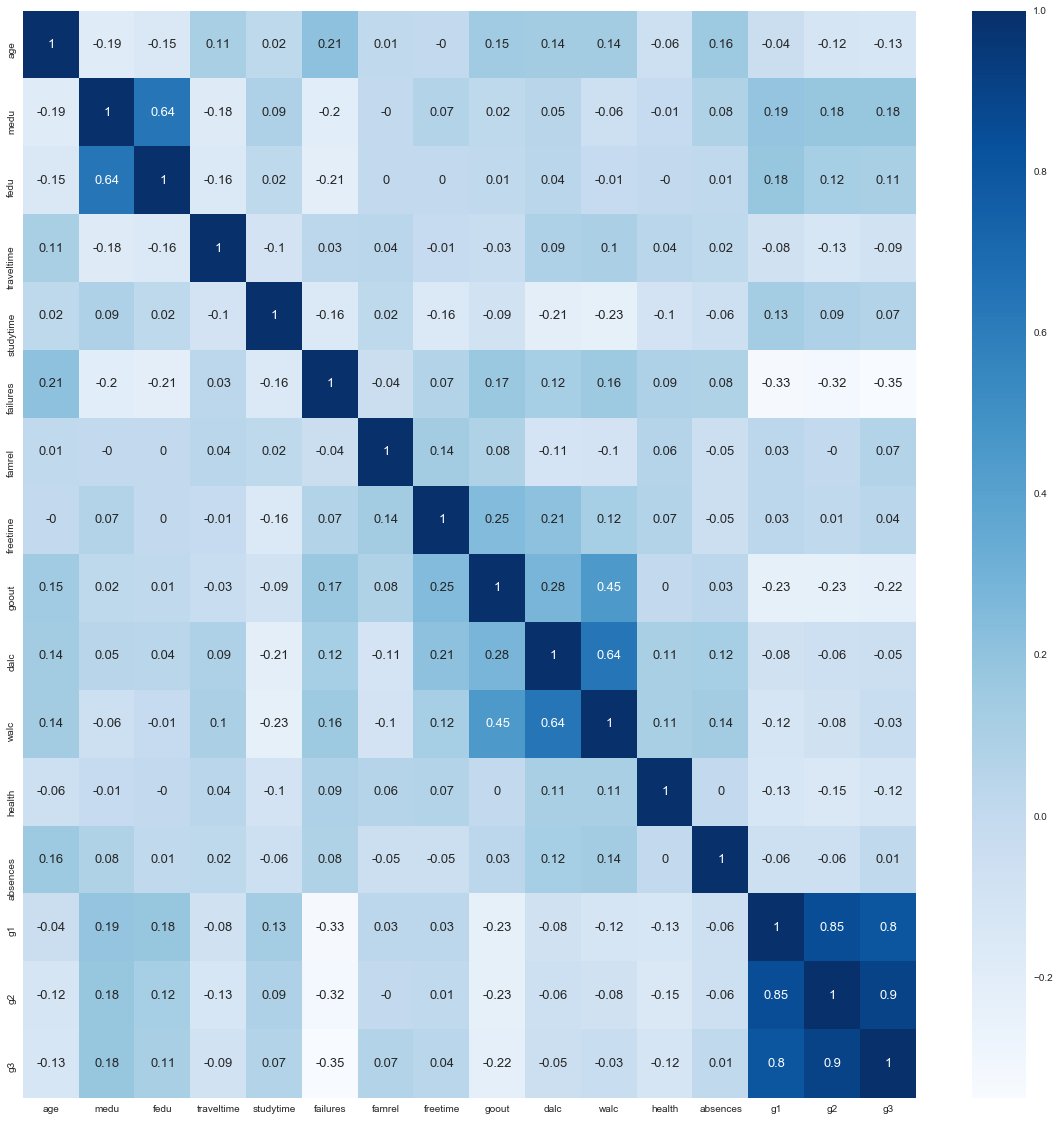

In [15]:
correlacion(df, 'g2', .4)

                                   CORRELACION ENTRE G3 Y LAS VARIABLES 
                        
age          -0.13
medu          0.18
fedu          0.11
traveltime   -0.09
studytime     0.07
failures     -0.35
famrel        0.07
freetime      0.04
goout        -0.22
dalc         -0.05
walc         -0.03
health       -0.12
absences      0.01
g1            0.80
g2            0.90
g3            1.00
Name: g3, dtype: float64

                                 CONSIDERANDO ÚNICAMENTE LAS CORRELACIONES MAYORES A 0.4

g1    0.8
g2    0.9
g3    1.0
Name: g3, dtype: float64


                                FUERZA DE ASOCIACIÓN ENTRE LAS VARIABLES MAYOR A 0.4                         



,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
age,1,,,,,,,,,,,,,,,
medu,,1,0.64,,,,,,,,,,,,,
fedu,,0.64,1,,,,,,,,,,,,,
traveltime,,,,1,,,,,,,,,,,,
studytime,,,,,1,,,,,,,,,,,
failures,,,,,,1,,,,,,,,,,
famrel,,,,,,,1,,,,,,,,,
freetime,,,,,,,,1,,,,,,,,
goout,,,,,,,,,1,,0.45,,,,,
dalc,,,,,,,,,,1,0.64,,,,,


Excluir del análisis la que explique menos el comportamiento de la variable a predecir. Debido a que, de los contrario, podría existir un fuerte problema de autocorrelacion en la predicción.


                                             GRÁFICO DE CALOR                                        


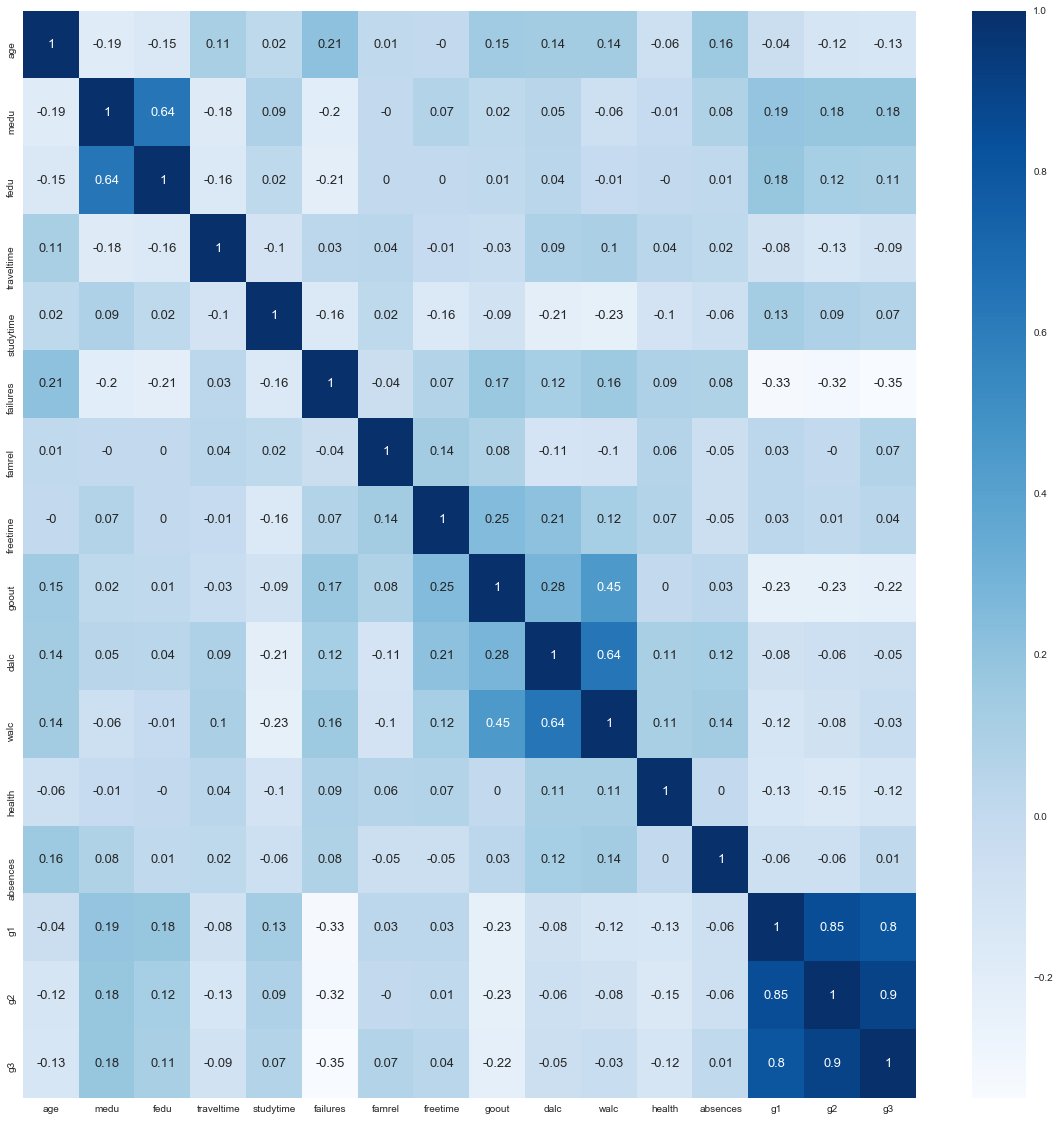

In [16]:
correlacion(df, 'g3', .4)

Los resultados de la matriz de correlación pueden ser desalentadores, dado que no hay asociaciones fuertes entre las variables. 

<font color = gray size = 3 >  
###### 3.5 Re-recodificación de variables
</font> 

Para simplficar el análisis y su posterior inclusión en un modelo predictivo, recodificamos las variables binarias como 0 y 1. Siguiendo el criterio de asignarle 1 a aquellas categorías minoritarias.

In [17]:
variables_binarias = ["school", "sex", "address", "famsize", "pstatus", "schoolsup", "famsup",
                      "paid", "activities", "nursery", "higher", "internet", "romantic"]

In [18]:
df = recodificacion_binaria(df, variables_binarias)

Los valores que asume la variable school originalmente son: 

GP    248
MS     37
Name: school, dtype: int64
                                 
La variable transformada school asume los nuevos valores de: 

0    248
1     37
Name: school, dtype: int64
----------------------------------------------------------------------------------- 
Los valores que asume la variable sex originalmente son: 

F    148
M    137
Name: sex, dtype: int64
                                 
La variable transformada sex asume los nuevos valores de: 

0    148
1    137
Name: sex, dtype: int64
----------------------------------------------------------------------------------- 
Los valores que asume la variable address originalmente son: 

U    214
R     71
Name: address, dtype: int64
                                 
La variable transformada address asume los nuevos valores de: 

0    214
1     71
Name: address, dtype: int64
----------------------------------------------------------------------------------- 
Los 

El procedimiento también debe aplicarse para aquelas variables nominales con más de 2 categorías siguiendo la misma lógica.

In [19]:
variables_nominales = ["mjob", "fjob", "reason", "guardian"]

In [20]:
df_dummy = pd.get_dummies(data = df, columns = variables_nominales)

Vemos nuestras nuevas columnas agregadas a la base:

In [21]:
df_dummy.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2',
       'g3', 'mjob_at_home', 'mjob_health', 'mjob_other', 'mjob_services',
       'mjob_teacher', 'fjob_at_home', 'fjob_health', 'fjob_other',
       'fjob_services', 'fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

<a id='MD'>
 
##  4. Modelación descriptiva

[(back to top)](#contenidos)

- Modelación del problema.
- Interpretación de los principales regresores en cada problema.
- Definición de las estrategias de Modelación predictiva

#### Modelo de regresión para la variable dependiente G1

In [22]:
modelo_ols_g1 = regresion_lineal(df_dummy, 'g1',['g1','g2','g3'],2,.5, cte= False, correccion = True, plot = False)
modelo_ols_g1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     g1   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     3.092
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           5.54e-08
Time:                        23:18:57   Log-Likelihood:                -685.69
No. Observations:                 285   AIC:                             1451.
Df Residuals:                     245   BIC:                             1597.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
school               -0.3671      0.664     -0.553      0.581      -1.675       0.941
sex                   0.7773      0.430      1.807      0.072      -0.070       1.625
age                   0.0739      0.184      0.401      0.689      -0.289       0.437
address              -0.0609      0.480     -0.127      0.899      -1.006       0.884
famsize               0.2841      0.436      0.651      0.515      -0.575       1.143
pstatus               0.1884      0.649      0.290      0.772      -1.091       1.467
medu                  0.1840      0.281      0.654      0.514      -0.370       0.738
fedu                  0.1549      0.236      0.657      0.512      -0.310       0.619
traveltime           -0.0123      0.290     -0.042      0.966      -0.583       0.559
studytime             0.5056      0.245      2.064      0.040       0.023       0.988
failures             -1.1177      0.282     -3.966      0.000      -1.673      -0.563
schoolsup            -1.7590      0.562     -3.128      0.002      -2.867      -0.651
famsup                1.0158      0.410      2.476      0.014       0.208       1.824
paid                  0.0195      0.402      0.048      0.961      -0.772       0.811
activities            0.4774      0.369      1.293      0.197      -0.250       1.205
nursery               0.0356      0.454      0.079      0.937      -0.859       0.930
higher               -1.1024      0.874     -1.261      0.209      -2.825       0.620
internet             -0.0551      0.500     -0.110      0.912      -1.041       0.930
romantic             -0.0733      0.398     -0.184      0.854      -0.857       0.710
famrel                0.1549      0.212      0.731      0.465      -0.262       0.572
freetime              0.3733      0.192      1.941      0.053      -0.005       0.752
goout                -0.7622      0.198     -3.852      0.000      -1.152      -0.372
dalc                 -0.0651      0.285     -0.228      0.820      -0.626       0.496
walc                  0.1554      0.209      0.742      0.459      -0.257       0.568
health               -0.2891      0.141     -2.048      0.042      -0.567      -0.011
absences             -0.0045      0.024     -0.185      0.853      -0.053       0.043
mjob_at_home          1.9827      0.829      2.392      0.017       0.350       3.615
mjob_health           2.9996      0.888      3.378      0.001       1.250       4.749
mjob_other            1.4193      0.781      1.817      0.070      -0.119       2.958
mjob_services         2.3401      0.790      2.962      0.003       0.784       3.896
mjob_teacher          0.8993      0.913      0.985      0.326      -0.899       2.697
fjob_at_home          2.4588      1.029      2.389      0.018       0.431       4.486
fjob_health           1.3771      1.077      1.279      0.202      -0.743

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
traveltime,-0.012305,0.289861,-0.042452,0.966173,-0.583243,0.558633
paid,0.019451,0.401683,0.048424,0.961418,-0.771741,0.810643
nursery,0.035649,0.453957,0.078529,0.937471,-0.858507,0.929805
internet,-0.055110,0.500287,-0.110157,0.912375,-1.040523,0.930302
address,-0.060896,0.479924,-0.126887,0.899134,-1.006200,0.884408
romantic,-0.073314,0.397828,-0.184285,0.853942,-0.856912,0.710285
absences,-0.004512,0.024366,-0.185184,0.853238,-0.052506,0.043481
dalc,-0.065057,0.285002,-0.228267,0.819629,-0.626424,0.496310
pstatus,0.188355,0.649404,0.290044,0.772028,-1.090771,1.467482
age,0.073900,0.184436,0.400679,0.689006,-0.289383,0.437182



Variables a excluir:  ['traveltime', 'paid', 'nursery', 'internet', 'address', 'romantic', 'absences', 'dalc', 'pstatus', 'age', 'school', 'famsize', 'medu', 'fedu']




Sí eliminamos la variable TRAVELTIME nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
paid,0.020780,0.399648,0.051996,0.958574,-0.766387,0.807948
nursery,0.037125,0.451705,0.082188,0.934564,-0.852577,0.926827
internet,-0.055126,0.499271,-0.110414,0.912171,-1.038517,0.928265
address,-0.065785,0.464957,-0.141486,0.887602,-0.981589,0.850020
absences,-0.004537,0.024309,-0.186640,0.852097,-0.052418,0.043344
romantic,-0.074557,0.395942,-0.188303,0.850795,-0.854426,0.705312
dalc,-0.065462,0.284264,-0.230286,0.818061,-0.625363,0.494439
pstatus,0.188503,0.648076,0.290865,0.771399,-1.087982,1.464987
age,0.074329,0.183785,0.404431,0.686247,-0.287665,0.436322
school,-0.372869,0.648655,-0.574833,0.565929,-1.650495,0.904758




Sí eliminamos la variable PAID nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
nursery,0.035023,0.448983,0.078005,0.937887,-0.849300,0.919346
internet,-0.058065,0.495060,-0.117288,0.906727,-1.033142,0.917013
address,-0.066685,0.463696,-0.143812,0.885766,-0.979987,0.846616
absences,-0.004537,0.024260,-0.187015,0.851803,-0.052320,0.043246
romantic,-0.074153,0.395066,-0.187697,0.851268,-0.852280,0.703975
dalc,-0.064792,0.283398,-0.228627,0.819348,-0.622977,0.493392
pstatus,0.186488,0.645609,0.288856,0.772934,-1.085113,1.458090
age,0.074523,0.183376,0.406394,0.684805,-0.286657,0.435703
school,-0.370413,0.645626,-0.573727,0.566675,-1.642046,0.901221
famsize,0.283501,0.433954,0.653298,0.514172,-0.571221,1.138223




Sí eliminamos la variable NURSERY nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
internet,-0.060975,0.492662,-0.123767,0.901600,-1.031309,0.909359
address,-0.066017,0.462687,-0.142683,0.886657,-0.977314,0.845279
absences,-0.004526,0.024211,-0.186933,0.851866,-0.052212,0.043160
romantic,-0.075520,0.393885,-0.191732,0.848109,-0.851307,0.700266
dalc,-0.065506,0.282682,-0.231732,0.816938,-0.622270,0.491257
pstatus,0.185006,0.644035,0.287261,0.774153,-1.083470,1.453482
age,0.073525,0.182562,0.402739,0.687487,-0.286045,0.433095
school,-0.364811,0.640333,-0.569721,0.569383,-1.625995,0.896373
famsize,0.281088,0.431982,0.650695,0.515846,-0.569732,1.131909
medu,0.182558,0.278785,0.654837,0.513180,-0.366529,0.731646




Sí eliminamos la variable INTERNET nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
address,-0.072805,0.458516,-0.158783,0.873968,-0.975869,0.830260
absences,-0.004204,0.024024,-0.175005,0.861218,-0.051520,0.043111
romantic,-0.070363,0.390900,-0.180003,0.857297,-0.840255,0.699528
dalc,-0.063474,0.281646,-0.225369,0.821877,-0.618187,0.491238
pstatus,0.174486,0.637138,0.273859,0.784420,-1.080381,1.429354
age,0.072049,0.181812,0.396284,0.692235,-0.286036,0.430134
school,-0.370123,0.637628,-0.580469,0.562123,-1.625955,0.885708
famsize,0.280705,0.431116,0.651113,0.515574,-0.568393,1.129803
medu,0.182939,0.278216,0.657541,0.511440,-0.365018,0.730895
fedu,0.154924,0.230779,0.671310,0.502646,-0.299603,0.609451




Sí eliminamos la variable ADDRESS nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
romantic,-0.069022,0.390046,-0.176959,0.859684,-0.837217,0.699172
absences,-0.004659,0.023806,-0.195730,0.844981,-0.051544,0.042226
dalc,-0.066971,0.280236,-0.238981,0.811316,-0.618895,0.484953
pstatus,0.175990,0.635825,0.276790,0.782170,-1.076266,1.428245
age,0.071897,0.181455,0.396227,0.692275,-0.285477,0.429272
school,-0.399442,0.609117,-0.655773,0.512574,-1.599096,0.800212
fedu,0.152848,0.229958,0.664676,0.506871,-0.300055,0.605750
famsize,0.286484,0.428739,0.668201,0.504622,-0.557916,1.130884




Sí eliminamos la variable ROMANTIC nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
absences,-0.005050,0.023657,-0.213462,0.831140,-0.051642,0.041542
dalc,-0.063409,0.278972,-0.227297,0.820378,-0.612835,0.486016
pstatus,0.168194,0.633072,0.265680,0.790704,-1.078615,1.415004
age,0.069972,0.180778,0.387061,0.699039,-0.286063,0.426008
school,-0.404522,0.607265,-0.666138,0.505935,-1.600505,0.791462
famsize,0.285135,0.427843,0.666449,0.505736,-0.557484,1.127755
fedu,0.153562,0.229479,0.669179,0.503996,-0.298387,0.605512
medu,0.183523,0.273068,0.672076,0.502154,-0.354275,0.721320




Sí eliminamos la variable ABSENCES nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
dalc,-0.062378,0.278402,-0.224058,0.822894,-0.610669,0.485913
pstatus,0.148713,0.625272,0.237838,0.812200,-1.082711,1.380137
age,0.062211,0.176748,0.351973,0.725153,-0.285881,0.410302
school,-0.382448,0.597261,-0.640336,0.522536,-1.558707,0.793811
medu,0.171189,0.266380,0.642651,0.521035,-0.353426,0.695804
famsize,0.282654,0.426874,0.662149,0.508481,-0.558042,1.123350




Sí eliminamos la variable DALC nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
pstatus,0.137739,0.622179,0.221381,0.824974,-1.087571,1.363048
age,0.059518,0.176008,0.338153,0.735528,-0.287109,0.406144
medu,0.160421,0.261516,0.613426,0.540146,-0.354605,0.675447
famsize,0.275110,0.424745,0.647706,0.517762,-0.561376,1.111595
school,-0.387884,0.595647,-0.651198,0.515509,-1.560942,0.785173




Sí eliminamos la variable PSTATUS nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
age,0.056188,0.175035,0.321010,0.748467,-0.288517,0.400894
medu,0.167268,0.259194,0.645336,0.519292,-0.343176,0.677712
school,-0.387509,0.594528,-0.651792,0.515125,-1.558341,0.783324




Sí eliminamos la variable AGE nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
school,-0.314408,0.548221,-0.573506,0.566808,-1.394026,0.765210
medu,0.161178,0.258044,0.624613,0.532783,-0.346991,0.669347




Sí eliminamos la variable SCHOOL nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
medu,0.161757,0.257704,0.627684,0.530770,-0.345733,0.669246
famsize,0.276788,0.410564,0.674166,0.500814,-0.531724,1.085300




Sí eliminamos la variable FAMSIZE nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
medu,0.140374,0.255473,0.549466,0.583163,-0.362713,0.643461
fedu,0.147866,0.225710,0.655115,0.512980,-0.296611,0.592342




Sí eliminamos la variable MEDU nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]




Sí eliminamos la variable FEDU nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]




SÍ CON LA ELIMINACIÓN DE CADA VARIABLE NO SIGNIFICATIVA
DISMINUYE EL CRITERIO DE AIC-BIC Y SE INCREMENTA EL R2 ADJ 
           ESTAMOS FRENTE A UN MEJOR MODELO !!!


,Vble Eliminada,R Cuadrado Ajustado,AIC,BIC
0,traveltime,0.2263,1449.38,1591.82
1,paid,0.2295,1447.38,1586.18
2,nursery,0.2326,1445.39,1580.53
3,internet,0.2356,1443.41,1574.90
4,address,0.2386,1441.43,1569.27
5,romantic,0.2415,1439.47,1563.65
6,absences,0.2444,1437.52,1558.05
7,dalc,0.2472,1435.58,1552.46
8,pstatus,0.2500,1433.63,1546.86
9,age,0.2527,1431.75,1541.32


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     g1   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     4.803
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           1.09e-11
Time:                        23:18:57   Log-Likelihood:                -686.48
No. Observations:                 285   AIC:                             1427.
Df Residuals:                     258   BIC:                             1526.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
sex                   0.8381      0.406      2.064      0.040       0.039       1.637
fedu                  0.2155      0.189      1.141      0.255      -0.157       0.588
studytime             0.5432      0.229      2.375      0.018       0.093       0.994
failures             -1.1397      0.268     -4.257      0.000      -1.667      -0.613
schoolsup            -1.8059      0.523     -3.456      0.001      -2.835      -0.777
famsup                1.0128      0.373      2.715      0.007       0.278       1.747
activities            0.4546      0.349      1.302      0.194      -0.233       1.142
higher               -1.0543      0.825     -1.278      0.202      -2.679       0.570
famrel                0.1726      0.202      0.853      0.394      -0.226       0.571
freetime              0.3638      0.184      1.978      0.049       0.002       0.726
goout                -0.7299      0.189     -3.870      0.000      -1.101      -0.358
walc                  0.1236      0.164      0.754      0.452      -0.199       0.446
health               -0.3113      0.135     -2.303      0.022      -0.577      -0.045
mjob_at_home          2.0371      0.490      4.156      0.000       1.072       3.002
mjob_health           3.4567      0.567      6.096      0.000       2.340       4.573
mjob_other            1.5825      0.433      3.654      0.000       0.730       2.435
mjob_services         2.6455      0.457      5.794      0.000       1.746       3.545
mjob_teacher          1.3411      0.532      2.523      0.012       0.294       2.388
fjob_at_home          2.6741      0.796      3.360      0.001       1.107       4.241
fjob_health           1.7041      0.821      2.074      0.039       0.086       3.322
fjob_other            1.3061      0.421      3.104      0.002       0.477       2.135
fjob_services         1.8182      0.464      3.921      0.000       0.905       2.731
fjob_teacher          3.5605      0.660      5.391      0.000       2.260       4.861
reason_course         2.5150      0.472      5.332      0.000       1.586       3.444
reason_home           2.8953      0.457      6.341      0.000       1.996       3.795
reason_other          2.5627      0.593      4.319      0.000       1.394       3.731
reason_reputation     3.0899      0.480      6.441      0.000       2.145       4.035
guardian_father       3.4621      0.584      5.929      0.000       2.312       4.612
guardian_mother       3.7421      0.530      7.062      0.000       2.699       4.786
guardian_other        3.8588      0.692      5.578      0.000       2.496       5.221
==============================================================================
Omnibus:                        6.135   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                4.229
Skew:   



                                           REAL VS PREDICCIÓN


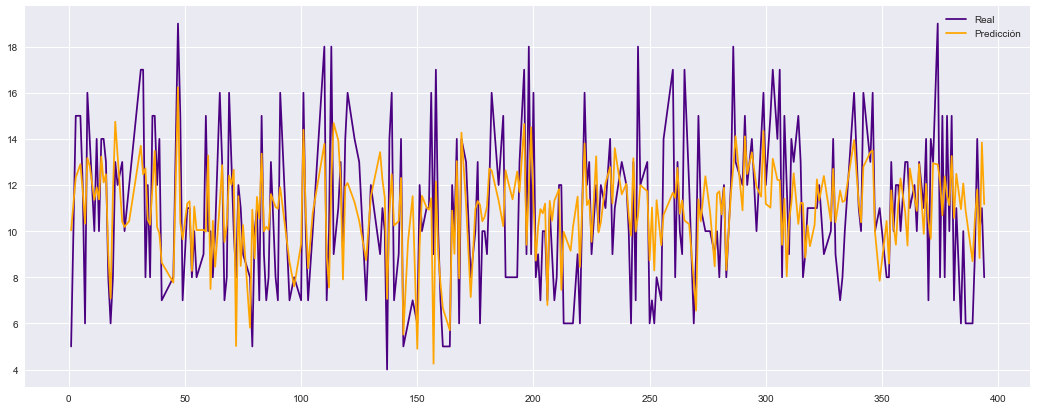

,g1,Modelo,Desvios,%Desvios
1,5.0,10.030976,-5.030976,-50.154402
3,15.0,12.325489,2.674511,21.699025
5,15.0,12.903423,2.096577,16.248220
6,12.0,11.764455,0.235545,2.002179
7,6.0,10.324353,-4.324353,-41.884981




El modelo tiene un desvio promedio de: 20.61


,sex,fedu,studytime,failures,schoolsup,famsup,activities,higher,famrel,freetime,...,fjob_other,fjob_services,fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
Coef.,0.838083,0.215498,0.543222,-1.139721,-1.805939,1.012784,0.45455,-1.054335,0.172562,0.363793,...,1.306077,1.818151,3.560545,2.515009,2.895341,2.562718,3.08989,3.462052,3.742089,3.858817


In [23]:
X1 = ['g1','g2','g3','traveltime', 'paid', 'nursery', 'internet', 'address', 'romantic', 
      'absences', 'dalc', 'pstatus', 'age', 'school', 'famsize', 'medu']

modelo_ols_g1 = regresion_lineal(df_dummy, 'g1',X1 ,2,.5, cte=False, correccion = False, plot = True)

#### Modelo de regresión para la variable dependiente G2

In [24]:
modelo_ols_g2 = regresion_lineal(df_dummy, 'g2',['g1','g2','g3'],2,.5, cte= False, correccion = True, plot = False)
modelo_ols_g2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     g2   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     2.696
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           2.05e-06
Time:                        23:18:58   Log-Likelihood:                -732.18
No. Observations:                 285   AIC:                             1544.
Df Residuals:                     245   BIC:                             1690.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
school                0.2628      0.782      0.336      0.737      -1.277       1.803
sex                   0.9037      0.506      1.785      0.076      -0.094       1.901
age                  -0.0731      0.217     -0.337      0.737      -0.501       0.355
address              -0.7972      0.565     -1.411      0.159      -1.910       0.316
famsize               0.4334      0.513      0.844      0.399      -0.578       1.445
pstatus               0.5964      0.764      0.780      0.436      -0.909       2.102
medu                  0.3254      0.331      0.983      0.327      -0.327       0.977
fedu                 -0.1208      0.278     -0.435      0.664      -0.668       0.426
traveltime           -0.2113      0.341     -0.619      0.536      -0.883       0.461
studytime             0.4152      0.288      1.440      0.151      -0.153       0.983
failures             -1.1230      0.332     -3.385      0.001      -1.777      -0.470
schoolsup            -1.0238      0.662     -1.547      0.123      -2.328       0.280
famsup                1.0127      0.483      2.097      0.037       0.062       1.964
paid                  0.4645      0.473      0.982      0.327      -0.467       1.396
activities            0.2167      0.435      0.499      0.619      -0.640       1.073
nursery              -0.1330      0.534     -0.249      0.804      -1.186       0.920
higher               -1.1037      1.029     -1.072      0.285      -3.131       0.924
internet             -0.4287      0.589     -0.728      0.467      -1.589       0.731
romantic             -0.7207      0.468     -1.539      0.125      -1.643       0.202
famrel                0.0389      0.249      0.156      0.876      -0.452       0.530
freetime              0.3272      0.226      1.445      0.150      -0.119       0.773
goout                -0.9581      0.233     -4.114      0.000      -1.417      -0.499
dalc                 -0.2015      0.335     -0.600      0.549      -0.862       0.459
walc                  0.3559      0.246      1.444      0.150      -0.130       0.841
health               -0.3873      0.166     -2.330      0.021      -0.715      -0.060
absences             -0.0076      0.029     -0.264      0.792      -0.064       0.049
mjob_at_home          2.6292      0.976      2.695      0.008       0.708       4.551
mjob_health           3.9237      1.045      3.753      0.000       1.864       5.983
mjob_other            2.5618      0.920      2.786      0.006       0.750       4.373
mjob_services         3.1204      0.930      3.355      0.001       1.288       4.952
mjob_teacher          1.6714      1.075      1.555      0.121      -0.445       3.788
fjob_at_home          2.7496      1.212      2.269      0.024       0.363       5.136
fjob_health           2.3436      1.267      1.849      0.066      -0.153

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
famrel,0.038854,0.249233,0.155894,0.876245,-0.452059,0.529767
nursery,-0.132961,0.534388,-0.248810,0.803716,-1.185542,0.919620
absences,-0.007572,0.028683,-0.263999,0.792003,-0.064069,0.048925
school,0.262774,0.781809,0.336109,0.737076,-1.277152,1.802699
age,-0.073139,0.217114,-0.336870,0.736503,-0.500788,0.354509
fedu,-0.120833,0.277605,-0.435268,0.663751,-0.667630,0.425964
activities,0.216739,0.434719,0.498574,0.618527,-0.639524,1.073002
dalc,-0.201455,0.335498,-0.600466,0.548751,-0.862284,0.459373
traveltime,-0.211290,0.341218,-0.619223,0.536345,-0.883386,0.460805



Variables a excluir:  ['famrel', 'nursery', 'absences', 'school', 'age', 'fedu', 'activities', 'dalc', 'traveltime']




Sí eliminamos la variable FAMREL nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
nursery,-0.131851,0.533280,-0.247245,0.804925,-1.182228,0.918526
absences,-0.007705,0.028613,-0.269289,0.787933,-0.064064,0.048653
school,0.248921,0.775201,0.321105,0.748404,-1.277957,1.775798
age,-0.071024,0.216259,-0.328419,0.742874,-0.496980,0.354933
fedu,-0.120200,0.277024,-0.433896,0.664744,-0.665842,0.425442
activities,0.217665,0.433815,0.501745,0.616296,-0.636802,1.072131
traveltime,-0.206163,0.338955,-0.608230,0.543596,-0.873787,0.461462
dalc,-0.207388,0.332671,-0.623401,0.533598,-0.862635,0.447860




Sí eliminamos la variable NURSERY nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
absences,-0.007757,0.028558,-0.271622,0.786140,-0.064006,0.048492
school,0.224150,0.767238,0.292153,0.770415,-1.287012,1.735313
age,-0.067235,0.215306,-0.312278,0.755092,-0.491304,0.356834
fedu,-0.112352,0.274676,-0.409033,0.682870,-0.653358,0.428655
activities,0.219998,0.432888,0.508211,0.611759,-0.632624,1.072620
traveltime,-0.199822,0.337341,-0.592345,0.554161,-0.864253,0.464609
dalc,-0.205159,0.331916,-0.618104,0.537076,-0.858906,0.448589




Sí eliminamos la variable ABSENCES nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
school,0.263590,0.751965,0.350535,0.726234,-1.217461,1.744641
age,-0.078772,0.210680,-0.373893,0.708803,-0.493722,0.336179
fedu,-0.107023,0.273463,-0.391363,0.695865,-0.645629,0.431582
activities,0.213661,0.431451,0.495215,0.620887,-0.636114,1.063435
traveltime,-0.201732,0.336637,-0.599258,0.549548,-0.864764,0.461299
dalc,-0.203049,0.331205,-0.613061,0.540398,-0.855383,0.449285




Sí eliminamos la variable SCHOOL nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
age,-0.053544,0.197657,-0.270893,0.786698,-0.442837,0.335749
fedu,-0.102986,0.272738,-0.377601,0.706048,-0.640155,0.434182
traveltime,-0.179490,0.330020,-0.543875,0.587014,-0.829475,0.470496
activities,0.236665,0.425679,0.555970,0.578730,-0.601725,1.075055
dalc,-0.199883,0.330499,-0.604792,0.545868,-0.850812,0.451046
internet,-0.380931,0.576513,-0.660751,0.509383,-1.516394,0.754532




Sí eliminamos la variable AGE nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
fedu,-0.103086,0.272232,-0.378671,0.705254,-0.639247,0.433075
activities,0.232574,0.424622,0.547721,0.584372,-0.603717,1.068866
traveltime,-0.181789,0.329298,-0.552050,0.581407,-0.830342,0.466764
dalc,-0.207202,0.328781,-0.630212,0.529132,-0.854736,0.440332




Sí eliminamos la variable FEDU nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
traveltime,-0.168187,0.326774,-0.514688,0.607224,-0.811756,0.475382
activities,0.236347,0.423780,0.557713,0.577538,-0.598270,1.070965
dalc,-0.197927,0.327308,-0.604712,0.545917,-0.842546,0.446693




Sí eliminamos la variable ACTIVITIES nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
traveltime,-0.170973,0.326289,-0.523991,0.600745,-0.813574,0.471629
dalc,-0.170905,0.323259,-0.528694,0.597483,-0.807538,0.465729




Sí eliminamos la variable DALC nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
traveltime,-0.177711,0.325576,-0.545835,0.585660,-0.818894,0.463473
internet,-0.378077,0.570241,-0.663013,0.507926,-1.501102,0.744947




Sí eliminamos la variable TRAVELTIME nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]




SÍ CON LA ELIMINACIÓN DE CADA VARIABLE NO SIGNIFICATIVA
DISMINUYE EL CRITERIO DE AIC-BIC Y SE INCREMENTA EL R2 ADJ 
           ESTAMOS FRENTE A UN MEJOR MODELO !!!


,Vble Eliminada,R Cuadrado Ajustado,AIC,BIC
0,famrel,0.1921,1542.38,1684.83
1,nursery,0.1952,1540.45,1679.25
2,absences,0.1982,1538.54,1673.68
3,school,0.2010,1536.68,1668.17
4,age,0.2040,1534.76,1662.60
5,fedu,0.2067,1532.93,1657.11
6,activities,0.2089,1531.28,1651.81
7,dalc,0.2111,1529.60,1646.48
8,traveltime,0.2133,1527.93,1641.16


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     g2   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     3.567
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           1.59e-08
Time:                        23:18:58   Log-Likelihood:                -732.97
No. Observations:                 285   AIC:                             1528.
Df Residuals:                     254   BIC:                             1641.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
sex                   0.9182      0.488      1.881      0.061      -0.043       1.880
address              -0.9490      0.506     -1.875      0.062      -1.946       0.048
famsize               0.4053      0.498      0.813      0.417      -0.576       1.387
pstatus               0.5739      0.734      0.782      0.435      -0.871       2.019
medu                  0.2346      0.264      0.890      0.374      -0.284       0.754
studytime             0.4469      0.274      1.631      0.104      -0.093       0.986
failures             -1.0925      0.321     -3.409      0.001      -1.724      -0.461
schoolsup            -1.0620      0.621     -1.709      0.089      -2.286       0.162
famsup                1.0654      0.466      2.288      0.023       0.148       1.982
paid                  0.4898      0.460      1.065      0.288      -0.416       1.395
higher               -1.1488      0.986     -1.165      0.245      -3.090       0.792
internet             -0.3859      0.569     -0.678      0.498      -1.507       0.735
romantic             -0.7400      0.452     -1.636      0.103      -1.631       0.151
freetime              0.3192      0.217      1.468      0.143      -0.109       0.747
goout                -0.9614      0.223     -4.311      0.000      -1.401      -0.522
walc                  0.2422      0.194      1.248      0.213      -0.140       0.624
health               -0.3973      0.162     -2.451      0.015      -0.717      -0.078
mjob_at_home          2.2476      0.576      3.901      0.000       1.113       3.382
mjob_health           3.7575      0.720      5.217      0.000       2.339       5.176
mjob_other            2.2089      0.477      4.632      0.000       1.270       3.148
mjob_services         2.8334      0.514      5.517      0.000       1.822       3.845
mjob_teacher          1.3546      0.690      1.962      0.051      -0.005       2.714
fjob_at_home          2.4901      0.949      2.625      0.009       0.622       4.359
fjob_health           2.0369      0.948      2.148      0.033       0.169       3.904
fjob_other            1.8503      0.491      3.769      0.000       0.883       2.817
fjob_services         2.6399      0.516      5.121      0.000       1.625       3.655
fjob_teacher          3.3847      0.759      4.457      0.000       1.889       4.880
reason_course         2.6046      0.520      5.004      0.000       1.580       3.630
reason_home           3.0765      0.503      6.118      0.000       2.086       4.067
reason_other          3.4437      0.688      5.008      0.000       2.090       4.798
reason_reputation     3.2771      0.538      6.088      0.000       2.217       4.337
guardian_father       4.1824      0.638      6.559      0.000       2.927       5.438
guardian_mother       4.2526      0.605      7.028      0.000       3.061



                                           REAL VS PREDICCIÓN


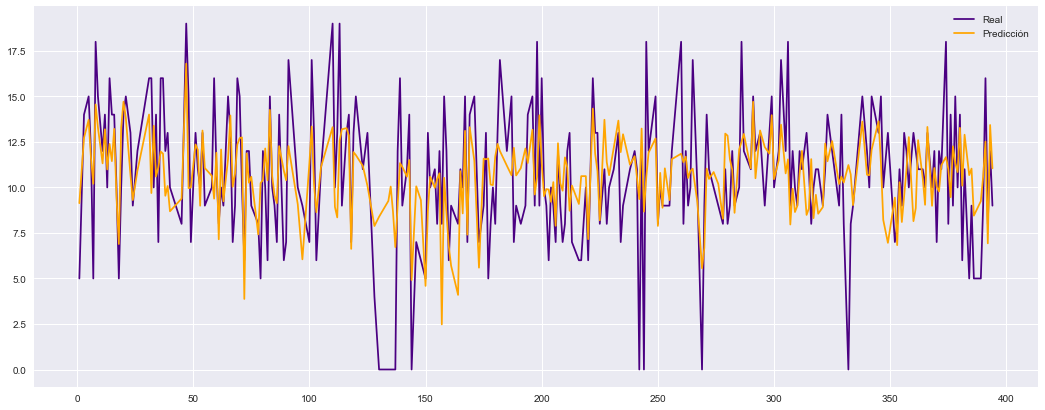

,g2,Modelo,Desvios,%Desvios
1,5,9.136811,-4.136811,-45.276314
3,14,12.726681,1.273319,10.005116
5,15,13.710731,1.289269,9.403357
6,12,11.621700,0.378300,3.255118
7,5,10.199586,-5.199586,-50.978404




El modelo tiene un desvio promedio de: 24.7


,sex,address,famsize,pstatus,medu,studytime,failures,schoolsup,famsup,paid,...,fjob_other,fjob_services,fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
Coef.,0.918245,-0.949049,0.405282,0.573894,0.234648,0.446858,-1.092463,-1.061984,1.065416,0.489753,...,1.850271,2.639903,3.384689,2.604554,3.076532,3.44367,3.277136,4.182404,4.252598,3.966889


In [25]:
X1 = ['g1','g2','g3','famrel', 'nursery', 'absences', 'school', 'age', 'fedu','traveltime', 'activities', 'dalc']

modelo_ols_g2 = regresion_lineal(df_dummy, 'g2',X1 ,2,.5, cte=False, correccion = False, plot = True)

#### Modelo de regresión para la variable dependiente G3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     g3   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              4445.
Date:                Sat, 14 Aug 2021   Prob (F-statistic):                   1.71e-214
Time:                        23:18:58   Log-Likelihood:                         -601.00
No. Observations:                 285   AIC:                                      1206.
Df Residuals:                     283   BIC:                                      1213.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
g1             0.0353      0.059      0.601      0.548      -0.080       0.151
g2             0.9542      0.059     16.088      0.000       0.837       1.071
==============================================================================
Omnibus:                      205.407   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1710.983
Skew:                          -3.040   Prob(JB):                         0.00
Kurtosis:                      13.349   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



                                           REAL VS PREDICCIÓN


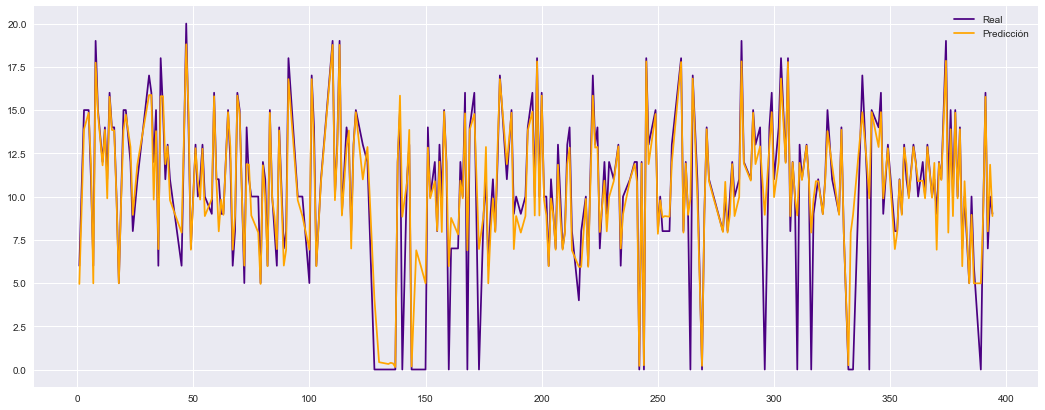

,g3,Modelo,Desvios,%Desvios
1,6.0,4.947662,1.052338,21.269392
3,15.0,13.888745,1.111255,8.001121
5,15.0,14.842987,0.157013,1.057826
6,11.0,11.874390,-0.874390,-7.363659
7,6.0,4.982953,1.017047,20.410538




El modelo tiene un desvio promedio de: 15.36


,g1,g2
Coef.,0.03529,0.954242


In [26]:
#X1 = ['g3','internet', 'mjob_other', 'fjob_at_home', 'nursery', 'sex', 'fjob_health', 'health',
#'traveltime', 'guardian_mother', 'reason_reputation', 'reason_other', 'paid', 'famsize', 'mjob_services', 
#'fjob_teacher', 'address', 'guardian_father', 'studytime', 'schoolsup', 'mjob_teacher','medu', 'mjob_health','reason_course']
X1 = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'dalc', 'walc', 'health', 'absences',
       'g3', 'mjob_at_home', 'mjob_health', 'mjob_other', 'mjob_services',
       'mjob_teacher', 'fjob_at_home', 'fjob_health', 'fjob_other',
       'fjob_services', 'fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other']

modelo_ols_g3 = regresion_lineal(df_dummy, 'g3',X1,2,.5, cte= False, correccion = False, plot = True)
modelo_ols_g3

In [27]:
modelo_ols_g4 = regresion_lineal(df_dummy, 'g3',['g1','g2','g3'],2,.5, cte= False, correccion = True, plot = False)
modelo_ols_g4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     g3   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     2.842
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           5.49e-07
Time:                        23:18:59   Log-Likelihood:                -783.03
No. Observations:                 285   AIC:                             1646.
Df Residuals:                     245   BIC:                             1792.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
school                0.9313      0.935      0.997      0.320      -0.909       2.772
sex                   1.0178      0.605      1.682      0.094      -0.174       2.210
age                  -0.1624      0.260     -0.626      0.532      -0.674       0.349
address              -0.9074      0.675     -1.344      0.180      -2.238       0.423
famsize               0.3455      0.614      0.563      0.574      -0.863       1.554
pstatus               1.0109      0.914      1.106      0.270      -0.789       2.811
medu                  0.5032      0.396      1.272      0.205      -0.276       1.283
fedu                 -0.3049      0.332     -0.919      0.359      -0.959       0.349
traveltime           -0.1287      0.408     -0.316      0.753      -0.932       0.675
studytime             0.3770      0.345      1.094      0.275      -0.302       1.056
failures             -1.4738      0.397     -3.716      0.000      -2.255      -0.693
schoolsup            -1.0542      0.791     -1.332      0.184      -2.613       0.504
famsup                0.9429      0.577      1.634      0.104      -0.194       2.080
paid                  0.5201      0.565      0.920      0.358      -0.593       1.633
activities            0.6271      0.520      1.207      0.229      -0.396       1.651
nursery              -0.0796      0.639     -0.125      0.901      -1.338       1.179
higher               -1.7268      1.230     -1.403      0.162      -4.150       0.697
internet             -0.4110      0.704     -0.584      0.560      -1.798       0.976
romantic             -0.8824      0.560     -1.576      0.116      -1.985       0.220
famrel                0.4907      0.298      1.647      0.101      -0.096       1.078
freetime              0.4699      0.271      1.736      0.084      -0.063       1.003
goout                -1.2361      0.278     -4.440      0.000      -1.784      -0.688
dalc                 -0.5453      0.401     -1.360      0.175      -1.335       0.245
walc                  0.7550      0.295      2.562      0.011       0.175       1.335
health               -0.3923      0.199     -1.974      0.049      -0.784      -0.001
absences              0.0337      0.034      0.984      0.326      -0.034       0.101
mjob_at_home          2.3411      1.166      2.008      0.046       0.044       4.638
mjob_health           3.6973      1.250      2.959      0.003       1.236       6.159
mjob_other            2.5957      1.099      2.361      0.019       0.431       4.761
mjob_services         3.0664      1.112      2.758      0.006       0.876       5.256
mjob_teacher          1.2972      1.285      1.010      0.314      -1.233       3.827
fjob_at_home          2.9680      1.449      2.049      0.042       0.115       5.821
fjob_health           2.3157      1.515      1.529      0.128      -0.668

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
nursery,-0.079578,0.638779,-0.124579,0.900959,-1.337777,1.178620
traveltime,-0.128748,0.407874,-0.315656,0.752533,-0.932134,0.674639
famsize,0.345476,0.613631,0.563002,0.573948,-0.863190,1.554142
internet,-0.411021,0.703971,-0.583860,0.559852,-1.797628,0.975587
age,-0.162426,0.259526,-0.625855,0.531992,-0.673614,0.348762



Variables a excluir:  ['nursery', 'traveltime', 'famsize', 'internet', 'age']




Sí eliminamos la variable NURSERY nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
traveltime,-0.124856,0.405861,-0.307633,0.758622,-0.924263,0.674550
famsize,0.350590,0.611030,0.573770,0.566648,-0.852927,1.554108
internet,-0.403618,0.700054,-0.576553,0.564769,-1.782482,0.975246
age,-0.160113,0.258343,-0.619769,0.535983,-0.668959,0.348733




Sí eliminamos la variable TRAVELTIME nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
famsize,0.342020,0.609275,0.561357,0.575063,-0.858016,1.542057
internet,-0.405184,0.698751,-0.579868,0.562532,-1.781455,0.971087
age,-0.156173,0.257552,-0.606376,0.544822,-0.663452,0.351105




Sí eliminamos la variable FAMSIZE nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
internet,-0.401776,0.697759,-0.575808,0.565267,-1.776066,0.972514
age,-0.155582,0.257194,-0.604919,0.545786,-0.662145,0.350981




Sí eliminamos la variable INTERNET nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
age,-0.16562,0.256258,-0.646303,0.518678,-0.670329,0.339089




Sí eliminamos la variable AGE nos quedan como:

                  VARIABLES NO SIGNIFICATIVAS


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]




SÍ CON LA ELIMINACIÓN DE CADA VARIABLE NO SIGNIFICATIVA
DISMINUYE EL CRITERIO DE AIC-BIC Y SE INCREMENTA EL R2 ADJ 
           ESTAMOS FRENTE A UN MEJOR MODELO !!!


,Vble Eliminada,R Cuadrado Ajustado,AIC,BIC
0,nursery,0.2050,1644.08,1786.53
1,traveltime,0.2080,1642.19,1780.98
2,famsize,0.2101,1640.55,1775.70
3,internet,0.2123,1638.93,1770.42
4,age,0.2141,1637.41,1765.25


<a id='MP'>
 
##  5. Modelación predictiva

[(back to top)](#contenidos)
    
- Preparación del ambiente de trabajo (imports, separación de muestras) para implementar modelos de predicción.
- Implementación de por lo menos tres modelos predictivos. 
- Reporte del mejor modelo predictivo en base a los resultados

MODELO
                              REGRESION LINEAL 1(c/i y normalizado)
R2:  0.809
MAE:  1.4
MSE:  3.991


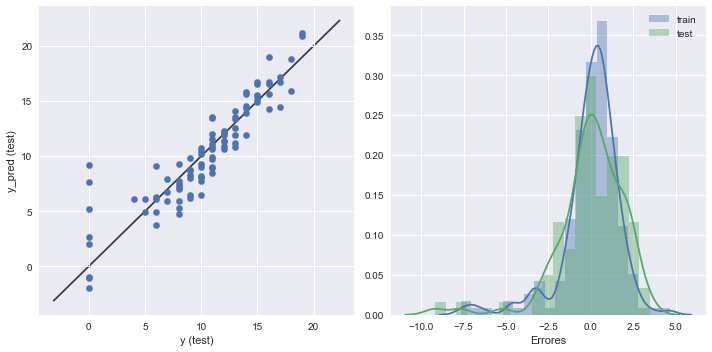

MODELO
                              REGRESION LINEAL 2(s/i y normalizado)
R2:  0.808
MAE:  1.403
MSE:  4.009


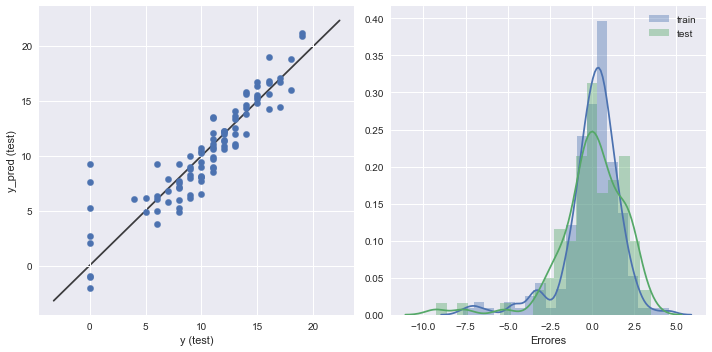

MODELO
                              REGRESION LINEAL 3(s/i y sin normalizar)
R2:  0.808
MAE:  1.403
MSE:  4.009


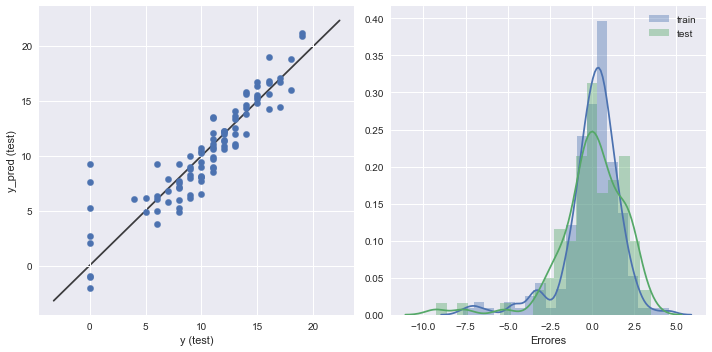



El valor que asumen los coeficientes en cada uno de los modelos es:


,Variables,Coeficientes_1,Coeficientes_2,Coeficientes_3
1,sex,6.486893e-01,0.735126,0.735126
2,age,2.814000e-02,0.032991,0.032991
3,address,-2.580281e-01,-0.263035,-0.263035
4,famsize,-1.333754e-01,-0.152823,-0.152823
5,pstatus,3.922195e-02,0.072487,0.072487
6,medu,6.016403e-01,0.583690,0.583690
7,fedu,4.541208e-01,0.449867,0.449867
8,traveltime,-3.973827e-01,-0.387764,-0.387764
9,studytime,1.260058e-01,0.110930,0.110930
10,failures,7.740852e-02,0.077192,0.077192



El valor que asumen el intercepto en cada uno de los modelos es:

El intercepto del modelo 1 es:  21927057782744.88
El intercepto del modelo 2 es:  0.0
El intercepto del modelo 3 es:  0.0


                                          DESVIO PROMEDIO

El modelo 1 tiene un desvio promedio de: 18.675
El modelo 2 tiene un desvio promedio de: 18.681
El modelo 3 tiene un desvio promedio de: 18.681


In [28]:
regresion_linealML(df_dummy,"g3", test_size=.33,random_state=2054)

<a id='base'>
 
##  6. Variables contenidas en la base de datos

[(back to top)](#contenidos)

Las variables que componen la base se detallan a continuación:
#### Binarias
- school: Escuela del estudiante. (binaria: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira).
- sex : Sexo del estudiante. (binaria: 'F' - Mujer o 'M' - Hombre)
- address : Ubicación de la casa del estudiante. (binaria: 'U' - urbana o 'R' - rural)
- famsize : Tamaño de la familia. (binaria: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus : Estado cohabitacional de los padres. (binaria: 'T' - cohabitando juntos o 'A' - viviendo separados)
- schoolsup : Apoyo educacional del colegio. (binaria: si o no) 
- famsup : Apoyo educacional familiar. (binaria: si o no)
- paid : Clases particulares pagadas (matemáticas o portugués) (binaria: si o no)
- activities : Actividades extracurriculares. (binaria: si o no)
- nursery : Asistió a guardería infantil. (binaria: si o no)
- higher : Desea proseguir estudios superiores (binaria: si o no)
- internet : Acceso a internet desde el hogar (binaria: si o no)
- romantic : Relación romántica (binaria: si o no)

#### Numéricas
- age : Edad del estudiante. (numérica: de 15 a 22)
- Medu : Nivel educacional de la madre. (numérica: 0 - ninguno, 1 - educación básica (4to), 2 - de 5to a 9, 3 - educación media, o 4 - educación superior).
- Fedu : Nivel educacional del padre. (numérica: 0 - ninguno, 1 - educación básica (4to), 2 - de 5to a 9, 3 - educación media, o 4 - educación superior).
- traveltime : Tiempo de viaje entre hogar y colegio. (numérica: 1 - <15 min., 2 - 15 a 30 min., 3 30 min. a 1 hora, or 4 - >1 hora).
- studytime : Horas semanales dedicadas al estudio. (numérica: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas) 
- failures : Número de clases reprobadas. (numérica: n si 1<=n<3, de lo contrario 4)
- famrel : Calidad de las relaciones familiares. (numérica: de 1 - muy malas a 5 - excelentes)
- freetime : Tiempo libre fuera del colegio (numérica: de 1 - muy poco a 5 - mucho)
- goout : Salidas con amigos (numérica: de 1 - muy pocas a 5 - muchas)
- Dalc : Consumo de alcohol en día de semana (numérica: de 1 - muy bajo a 5 - muy alto)
- Walc : Consumo de alcohol en fines de semana (numérica: de 1 - muy bajo a 5 - muy alto)
- health : Estado de salud actual (numérica: from 1 - muy malo to 5 - muy bueno)
- absences : Cantidad de ausencias escolares (numérica: de 0 a 93)
- G1 : Notas durante el primer semestre (numérica: de 0 a 20). Este es uno de sus vectores objetivos para el modelo descriptivo. 
- G2 : Notas durante el segundo semestre (numérica: de 0 a 20). Este es uno de sus vectores objetivos para el modelo descriptivo.
- G3 : Promedio final (numérica: de 0 a 20). Este es uno de sus vectores objetivos para el modelo descriptivo y el vector a predecir en el modelo predictivo.

#### Nominal
- Mjob : Ocupación de la madre. (nominal: 'teacher' profesora, 'health' relacionada a salud, 'services' (e.g. administración pública o policía), 'at_home' en casa u 'other' otra).
- Fjob : Ocupación del padre (nominal: 'teacher' profesor, 'health' relacionado a salud, 'services' (e.g. administración pública o policía), 'at_home' en casa u 'other' otra). 
- reason : Razón para escoger la escuela (nominal: 'home' cercano a casa, 'reputation' reputación de la escuela, 'course' preferencia de cursos u 'other' otra)
- guardian : Apoderado del estudiante (nominal: 'mother' madre, 'father' padre u 'other' otro)